In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [23]:
#df=pd.read_csv('NO2_data.csv',parse_dates=['month'],header=1) #just NOx data

In [ ]:
df.head()

In [ ]:
#df2=pd.read_csv('all_contaminants_data.csv', header=1) #data contains all contaminants

In [ ]:
#df2.head()

In [ ]:
#df3 = df2[["Date","NO2","BAM_PM25"]]  #selected columns from df2

In [ ]:
#df3.tail(20)

In [ ]:
#df3.drop(df3.index[0],inplace=True)

In [35]:
df4=pd.read_csv('contam_Beacon_data.csv', header=1)
df4

,Date,Time,Trace SO2,Trace NO,Trace NOy,Trace NOy-NO,WAQA_CO,O3,RTEMP,Wind Spd S,Wind Dir S,Temp Amb,Amb Press,Rain,RH,BAM_PM25,NO2_CAPS
0,NaN,NaN,ppb,ppb,ppb,ppb,ppm,ppm,DegF,MPH,Deg,DegF,mb,mm,%,ug/m^3,ppb
1,2/1/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.007,67,3.5,NaN,38.8,NaN,NaN,NaN,NaN,NaN
2,2/2/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.002,67,2.7,NaN,36.9,NaN,NaN,NaN,NaN,NaN
3,2/3/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.004,67,4.1,NaN,38.8,NaN,NaN,NaN,NaN,NaN
4,2/4/07,12:00 AM,NaN,NaN,NaN,NaN,NaN,0.002,74,2.3,NaN,44,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,MaxTime,NaN,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00,12:00
4821,Avg,NaN,0.99,7.1,19.4,12.1,0.222,0.018,74,3.9,162.7,52.1,1004,337127,77,3.4,10.562
4822,Num,NaN,3968,4701,4701,4701,527,4602,4769,4453,4245,4532,3531,2328,3959,94,716
4823,Data[%],NaN,82,97,97,97,10,95,99,92,88,94,73,48,82,1,14


In [36]:
df_NO2_raw=df4[['Date','NO2_CAPS']]
df_NO2_raw

,Date,NO2_CAPS
0,NaN,ppb
1,2/1/07,NaN
2,2/2/07,NaN
3,2/3/07,NaN
4,2/4/07,NaN
...,...,...
4820,MaxTime,12:00
4821,Avg,10.562
4822,Num,716
4823,Data[%],14


In [ ]:
#df_NO2.tail(20)

In [37]:
df_NO2=df_NO2_raw.iloc[:4815]
df_NO2

,Date,NO2_CAPS
0,NaN,ppb
1,2/1/07,NaN
2,2/2/07,NaN
3,2/3/07,NaN
4,2/4/07,NaN
...,...,...
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401
4813,4/5/20,4.253


In [38]:
msk=df_NO2['NO2_CAPS'].isnull()

In [39]:
df_NO2_no_nulls=df_NO2[~msk]
df_NO2_no_nulls

,Date,NO2_CAPS
0,NaN,ppb
4089,4/12/18,5.117
4090,4/13/18,6.056
4091,4/14/18,10.857
4092,4/15/18,6.631
...,...,...
4809,4/1/20,6.582
4810,4/2/20,6.52
4811,4/3/20,3.149
4812,4/4/20,4.401


In [47]:
df_NO2_totally_cleaned = df_NO2_no_nulls.loc[4089:]
df_NO2_totally_cleaned['Date'] = pd.to_datetime(df_NO2_totally_cleaned['Date'])
df_NO2_totally_cleaned.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,NO2_CAPS
4089,2018-04-12,5.117
4090,2018-04-13,6.056
4091,2018-04-14,10.857
4092,2018-04-15,6.631
4093,2018-04-16,5.504


In [51]:
df_NO2_totally_cleaned['Month'] = df_NO2_totally_cleaned['Date'].dt.month
df_NO2_totally_cleaned['Year'] = df_NO2_totally_cleaned['Date'].dt.year
df_NO2_totally_cleaned.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,NO2_CAPS,Month,Year
4089,2018-04-12,5.117,4,2018
4090,2018-04-13,6.056,4,2018
4091,2018-04-14,10.857,4,2018
4092,2018-04-15,6.631,4,2018
4093,2018-04-16,5.504,4,2018


In [61]:
df_NO2_totally_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 4089 to 4813
Data columns (total 4 columns):
Date        716 non-null datetime64[ns]
NO2_CAPS    716 non-null object
Month       716 non-null int64
Year        716 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 48.0+ KB


In [44]:
df_NO2_totally_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 4/12/18 to 4/5/20
Data columns (total 1 columns):
NO2_CAPS    716 non-null object
dtypes: object(1)
memory usage: 11.2+ KB


In [89]:
#cast NO2 values to float data type
df_NO2_totally_cleaned['NO2_CAPS']=df_NO2_totally_cleaned['NO2_CAPS'].astype(float)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_NO2_totally_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 4089 to 4813
Data columns (total 4 columns):
Date        716 non-null datetime64[ns]
NO2_CAPS    716 non-null float64
Month       716 non-null int64
Year        716 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 48.0 KB


In [116]:
df_NO2_totally_cleaned.groupby(['Year', 'Month'])['NO2_CAPS'].mean()

Year  Month
2018  4         7.909053
      5         9.021935
      6         8.118600
      7        11.363357
      8        13.524452
      9         8.695857
      10       13.669452
      11       12.958000
      12       11.170516
2019  1        16.315226
      2        11.887893
      3        11.618194
      4         7.285700
      5        10.197032
      6         6.845111
      7         8.393903
      8         9.302323
      9         8.659633
      10       11.508516
      11       11.944267
      12       13.267516
2020  1         9.342161
      2        11.096714
      3         8.757323
      4         4.981000
Name: NO2_CAPS, dtype: float64

In [85]:
df_NO2_totally_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 4089 to 4813
Data columns (total 4 columns):
Date        716 non-null datetime64[ns]
NO2_CAPS    716 non-null object
Month       716 non-null int64
Year        716 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 48.0+ KB


In [92]:
#df_NO2_totally_cleaned['Date'].apply(pd.to_datetime).copy()
#df_NO2_totally_cleaned['Date'].apply(lambda date: pd.to_datetime(date))


In [93]:
#df_NO2_totally_cleaned.Date.dt.month

In [94]:
#df_NO2_totally_cleaned.set_index('Date', inplace=True)
#df_NO2_totally_cleaned

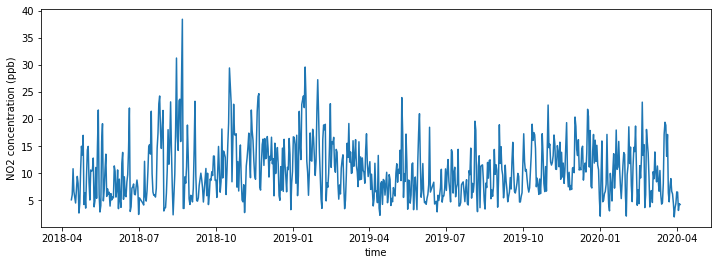

In [98]:
fig,ax = plt.subplots(figsize=(12,4))
ax.set_xlabel('time')
ax.set_ylabel('NO2 concentration (ppb)')
ax.plot('Date','NO2_CAPS',data=df_NO2_totally_cleaned)

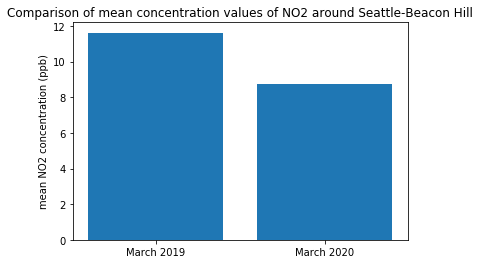

In [124]:
import numpy as np
#x = np.arange(len(df_NO2_totally_cleaned['Month']))

fig2, ax2 = plt.subplots()

ax2.bar(['March 2019','March 2020'], [11.618194,8.757323])

ax2.set_ylabel('mean NO2 concentration (ppb)')

ax2.set_title('Comparison of mean concentration values of NO2 around Seattle-Beacon Hill');

#ax2.set_xticks('Month')
#ax.set_xticklabels(record_counts['genre'])

In [130]:
df_NO2_totally_cleaned.groupby(df_NO2_totally_cleaned[df_NO2_totally_cleaned['Month']==3])['NO2_CAPS'].mean()


ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

In [ ]:
#df5.drop(df5.index[0], inplace=True)

In [ ]:
#df5.info()

In [99]:
#df5['date'].apply(lambda date: pd.to_datetime(date))

In [ ]:
#fig,ax = plt.subplots()

#ax.scatter(x=df['Date'],y=df['NO2-conc'])